# Using a pre-trained model from Huggingface to calculate similarity between code fragments

This workbook demonstrates how to use a pre-trained model from Huggingface to calculate similarity between code fragments. The model used is `microsoft/codebert-base`. The code fragments are tokenized and then passed through the model to get the embeddings. The embeddings are then used to calculate the similarity between the code fragments.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Downloading the model

When we use the model from Huggingface, we do not have to worry about tokenizers and other elements. We can just use the model directly. 


In [15]:
# import the feature extraction pipeline
from transformers import pipeline

# create the pipeline, which will extract the embedding vectors
# the models are already pre-defined, so we do not need to train anything here
features = pipeline(
    "feature-extraction",
    model="microsoft/codebert-base",
    tokenizer="microsoft/codebert-base", 
    return_tensor = False
)

# extract the features == embeddings
lstFeaturesTest = features('Class Singleton::X1')
lstFeaturesRefPositive = features('Class Singleton::Singleton')
lstFeaturesRefNegative = features('Class SpoonNotSingleton::SpoonNotSingleton')

# print the first token's embedding [CLS]
# which is also a good approximation of the whole sentence embedding
# the same as using np.mean(lstFeatures[0], axis=0)
embeddingsTest = lstFeaturesTest[0][0]
embeddingsRefPositive = lstFeaturesRefPositive[0][0]
embeddingsRefNegative = lstFeaturesRefNegative[0][0]

In [13]:
# now, calculate the cosine similarity between the test and the reference embeddings
from sklearn.metrics.pairwise import cosine_similarity

# calculate the cosine similarity between the test and the reference embeddings
similarityPositive = cosine_similarity([embeddingsTest], [embeddingsRefPositive])
similarityNegative = cosine_similarity([embeddingsTest], [embeddingsRefNegative])

print('Similarity to positive reference:', similarityPositive)
print('Similarity to negative reference:', similarityNegative)

# if the positive reference is closer to the test embedding than the negative reference
# then the test embedding is considered to be Singleton
isSingleton = similarityPositive > similarityNegative
print('Is Singleton:', isSingleton)


Similarity to positive reference: [[0.9991091]]
Similarity to negative reference: [[0.99717971]]
Is Singleton: [[ True]]


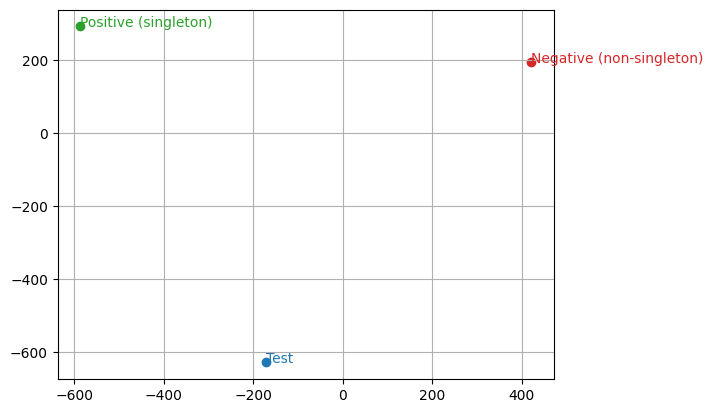

In [24]:
# we can also use t-SNE to visualize the embeddings
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# create a t-SNE model
model = TSNE(n_components=2, random_state=42, perplexity=2)

# fit the model to the data
np.set_printoptions(suppress=True)

# create a 2D representation of the embeddings
Y = model.fit_transform(np.vstack([embeddingsTest, embeddingsRefPositive, embeddingsRefNegative]))

# Tableau color palette
tableau_colors = ['tab:blue', 'tab:green', 'tab:red']

# plot the 2D representation
plt.scatter(Y[0][0], Y[0][1], color=tableau_colors[0])
plt.scatter(Y[1][0], Y[1][1], color=tableau_colors[1])
plt.scatter(Y[2][0], Y[2][1], color=tableau_colors[2])

# add the labels
plt.text(Y[0][0], Y[0][1], 'Test', color=tableau_colors[0])
plt.text(Y[1][0], Y[1][1], 'Positive (singleton)', color=tableau_colors[1])
plt.text(Y[2][0], Y[2][1], 'Negative (non-singleton)', color=tableau_colors[2])

# add gridlines
plt.grid(True)

# show the plot
plt.show()

## Where to go from here

Now that you know how to turn code fragments into embeddings and calculate similarity, you can use this to build a code search engine, or to find similar code fragments in a large codebase. 

1. Create a script that looks for security vulnerabilities in a larger code base. 
    a. you can use this repository for some examples: https://github.com/conikeec/seeve or https://github.com/tuhh-softsec/vul4j 